In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





In [3]:
pd.set_option('display.max_columns',20) 
df = pd.read_csv("D:/ETUDES/Etude Machine Learning Marouan/Segmentation client/clients_fictifs_complet.csv")

In [4]:
df.head()

,ID du client,Âge,Revenu annuel,Score de dépense,Genre,Pays,Région,Statut marital,Nombre d'enfants,Niveau d'éducation,Statut d'emploi,Nombre de transactions,Valeur moyenne des transactions,Score de fidélité
0,1,56,125186,58,Homme,Italie,Ouest,Marié,4,Master,Chômeur,62,438.464332,10
1,2,69,54674,67,Homme,France,Nord,Marié,2,Bac,Indépendant,23,289.835650,15
2,3,46,55854,56,Homme,Royaume-Uni,Centre,Veuf,2,Doctorat,Employé,46,14.409342,42
3,4,32,66271,40,Homme,Allemagne,Sud,Marié,2,Aucun,Indépendant,56,136.327328,93
4,5,60,93688,98,Femme,Italie,Sud,Célibataire,1,Master,Employé,7,209.343097,57


In [5]:
# Sélectionner les caractéristiques pertinentes
features = ['Âge', 'Revenu annuel', 'Score de dépense', 'Genre', 'Pays', 'Région',
            'Statut marital', 'Nombre d\'enfants', 'Niveau d\'éducation', 'Statut d\'emploi',
            'Nombre de transactions', 'Valeur moyenne des transactions', 'Score de fidélité']

In [6]:
X = df[features]

In [7]:
numeric_features = ['Âge', 'Revenu annuel', 'Score de dépense', 'Nombre d\'enfants', 
                    'Nombre de transactions', 'Valeur moyenne des transactions', 'Score de fidélité']
categorical_features = ['Genre', 'Pays', 'Région', 'Statut marital', 'Niveau d\'éducation', 'Statut d\'emploi']

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [9]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [10]:
df['Segment'] = pipeline.fit_predict(X)

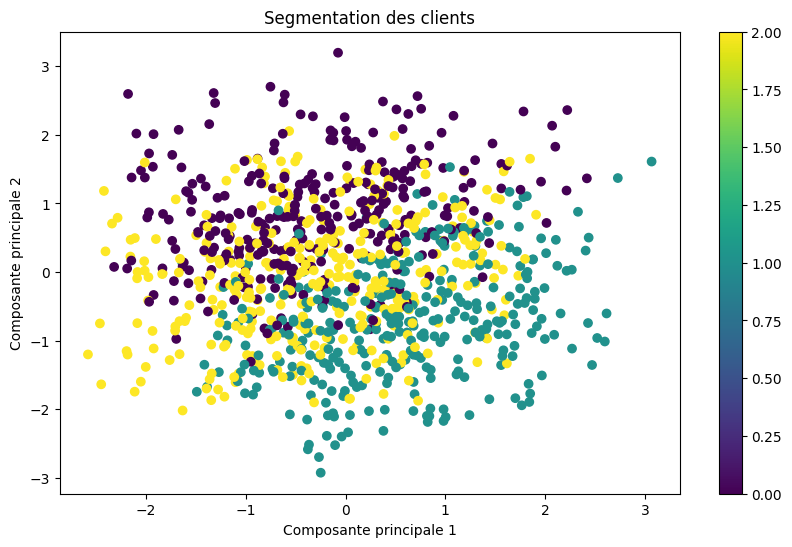

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(X))

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Segment'], cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Segmentation des clients')
plt.colorbar()
plt.show()

In [12]:
df.to_csv('clients_segmentes.csv', index=False, encoding='utf-8')